<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 3.7이상

In [ ]:
import sys
assert sys.version_info >= (3, 7)

In [ ]:
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

사이킷런이 1.0.1 이상

In [ ]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

폰트크기를 지정

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes',titlesize=14)
plt.rc('axes',labelsize=14)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

출력 결과를 일정하게 유지하기 위해서 랜덤시드를 지정

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 다운로드
url = "https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv"
lifesat = pd.read_csv(url)


In [ ]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [ ]:
X = lifesat.iloc[:,1].to_numpy()
y = lifesat.iloc[:,2].to_numpy()

In [ ]:
X, y

(array([26456.38793813, 27287.08340093, 28384.98778463, 29932.49391006,
        31007.76840654, 32181.15453723, 32238.15725928, 35638.42135118,
        36215.44759073, 36547.73895598, 36732.03474403, 38341.30757041,
        38992.14838075, 41627.12926943, 42025.61737306, 42404.39373816,
        45856.62562648, 47260.80045844, 48210.03311134, 48697.83702825,
        50683.32350972, 50922.35802345, 51935.60386182, 52279.72885136,
        54209.56383573, 55938.2128086 , 60235.7284917 ]),
 array([5.8, 5.4, 5.5, 5.9, 5.6, 5.4, 6.1, 5.7, 6.3, 5.9, 5.9, 7.2, 6. ,
        6.8, 6.5, 7.3, 7.4, 7.6, 6.9, 7.3, 7.3, 7. , 7.1, 7.5, 7.4, 7.6,
        6.9]))

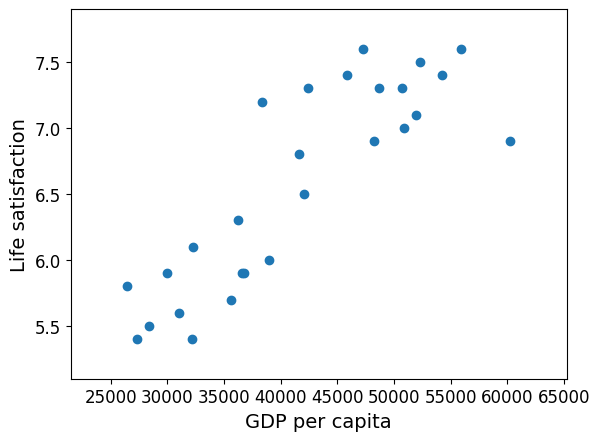

In [ ]:
# 그래프를 그린다
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(np.min(X)-5000, np.max(X)+5000)
plt.ylim(np.min(y)-0.3, np.max(y)+0.3)
plt.show()


In [ ]:
X.shape , y.shape

((27,), (27,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 선형모델을 선택
model = LinearRegression()
model.fit(X.reshape(-1,1), y)

LinearRegression()

In [ ]:
# 예측을 만든다.
32_422.57 # 우리나라 1인당 GDP
X_new = np.array([[32_422.57]])
y_pred = model.predict(X_new)

In [ ]:
y_pred

array([5.94694293])

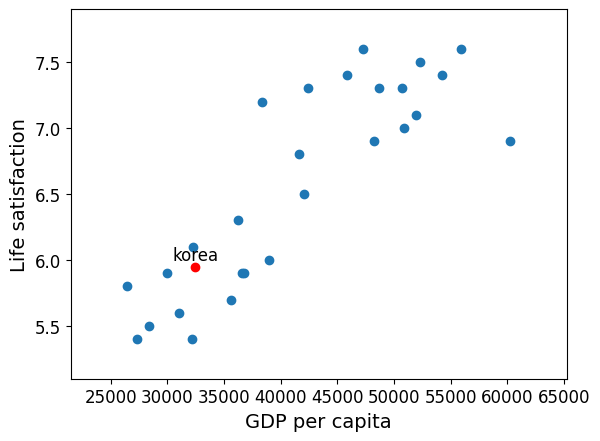

In [ ]:
# 그래프 표시하기
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(np.min(X)-5000, np.max(X)+5000)
plt.ylim(np.min(y)-0.3, np.max(y)+0.3)
plt.scatter(X_new, y_pred, c= 'r')
plt.text(X_new-2000, y_pred+0.05, 'korea')
plt.show()

In [ ]:
# k최근접 이웃 알고리즘으로 변경
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X.reshape(-1,1), y)
y_pred2 = model.predict(X_new)
print(y_pred2)

[5.7]


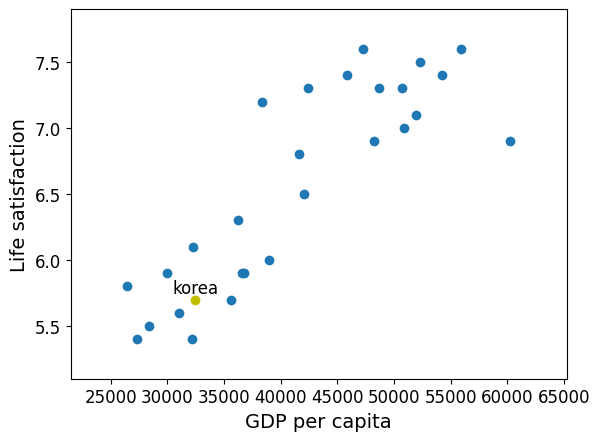

In [ ]:
# 그래프 표시하기
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(np.min(X)-5000, np.max(X)+5000)
plt.ylim(np.min(y)-0.3, np.max(y)+0.3)
plt.scatter(X_new, y_pred2, c= 'y')
plt.text(X_new-2000, y_pred2+0.05, 'korea')
plt.show()

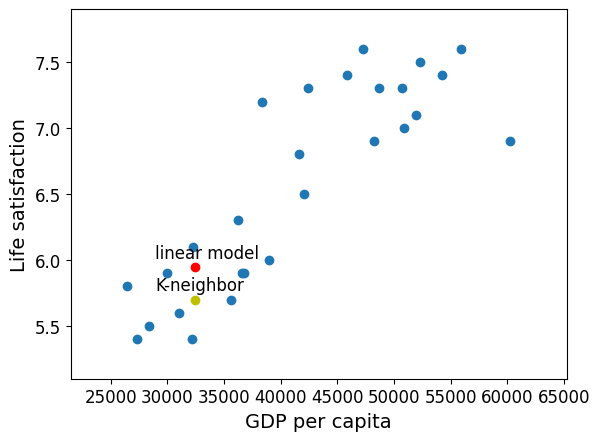

In [ ]:
# 그래프 표시하기
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(np.min(X)-5000, np.max(X)+5000)
plt.ylim(np.min(y)-0.3, np.max(y)+0.3)
plt.scatter(X_new, y_pred, c= 'r')
plt.text(X_new-3500, y_pred+0.07, 'linear model')
plt.scatter(X_new, y_pred2, c= 'y')
plt.text(X_new-3500, y_pred2+0.07, 'K-neighbor')
plt.show()

In [ ]:
type(X_new), type(y_pred), type(X), type(y)


(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

삶의 만족도 데이터 로드

In [ ]:
url = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/gdp_per_capita.csv'
url2 = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/oecd_bli.csv'

In [ ]:
gdp = pd.read_csv(url)
oecd = pd.read_csv(url2)

In [ ]:
gdp.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117


In [ ]:
oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [ ]:
gdp['Year'].value_counts()

,count
Year,
2017,240
2013,240
2014,240
2015,240
2016,240
2018,239
2011,238
2012,238
2019,238


In [ ]:
# 2020년 데이터만 추출
gdp[gdp['Year'] == 2020]

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913
111,Albania,ALB,2020,13295.410885
142,Algeria,DZA,2020,10681.679297
...,...,...,...,...
6984,Vanuatu,VUT,2020,2762.791388
7015,Vietnam,VNM,2020,8200.331867
7046,World,OWID_WRL,2020,16194.040310
7077,Zambia,ZMB,2020,3270.035112


In [ ]:
gdp[gdp['Year'] == 2020].columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')

<Axes: xlabel='GDP per capita, PPP (constant 2017 international $)', ylabel='Count'>

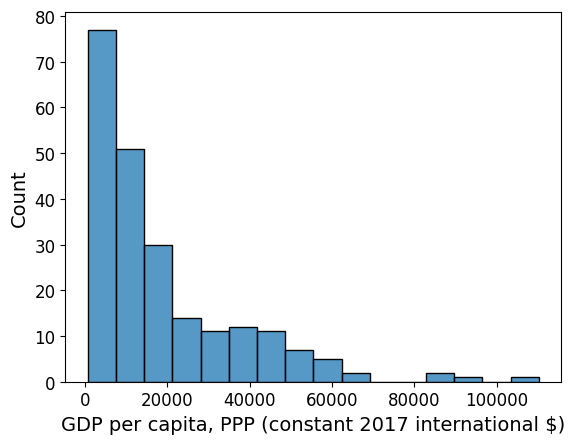

In [ ]:
# 2020년 각 나라별 ppp 히스토그램
import seaborn as sns
sns.histplot(data=gdp[gdp['Year'] == 2020], x='GDP per capita, PPP (constant 2017 international $)')

In [ ]:
oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [ ]:
oecd.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [ ]:
oecd = oecd[oecd['INEQUALITY'] == 'TOT' ]

In [ ]:
oecd = oecd.pivot(index='Country', columns='Indicator', values='Value')

In [ ]:
oecd.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [ ]:
# 2020년 데이터만 추출
gdp_2020 = gdp[gdp['Year'] == 2020]
gdp_2020 = gdp_2020.pivot(index='Entity', columns='Year', values='GDP per capita, PPP (constant 2017 international $)')

In [ ]:
gdp_2020.head()

Year,2020
Entity,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [ ]:
pd.merge(oecd, gdp_2020, how='inner', left_index=True , right_index= True)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,2020
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0,48697.837028
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0,51935.603862
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3,48210.033111
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,14063.982505
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3,45856.625626
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5,23324.524751
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,13441.492952
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5,55938.212809
Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,17.0,...,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7,35638.421351
Finland,6.0,0.5,88.0,3.81,70.0,85.1,1.3,29943.0,200827.0,23.0,...,95.0,1.9,70.0,2.2,523.0,15.17,67.0,95.0,19.8,47260.800458


In [ ]:
min_gdp = gdp_2020.min()
max_gdp = gdp_2020.max()

In [ ]:
min_gdp , max_gdp

(Year
 2020    731.06323
 dtype: float64,
 Year
 2020    110261.157353
 dtype: float64)

In [ ]:
merged_data = pd.merge(oecd, gdp_2020, how='inner', left_index=True , right_index= True)

In [ ]:
merged_data.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,2020
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0,48697.837028
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0,51935.603862
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3,48210.033111
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,14063.982505
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3,45856.625626


In [ ]:
merged_data.columns

Index([                                    'Air pollution',
                      'Dwellings without basic facilities',
                                  'Educational attainment',
                       'Employees working very long hours',
                                         'Employment rate',
                     'Feeling safe walking alone at night',
                                           'Homicide rate',
                'Household net adjusted disposable income',
                                    'Household net wealth',
                                     'Housing expenditure',
                                'Labour market insecurity',
                                         'Life expectancy',
                                       'Life satisfaction',
                             'Long-term unemployment rate',
                                       'Personal earnings',
                              'Quality of support network',
                                        

In [ ]:
data = merged_data[[2020, 'Life expectancy']]

In [ ]:
data.head()

,2020,Life expectancy
Australia,48697.837028,82.5
Austria,51935.603862,81.7
Belgium,48210.033111,81.5
Brazil,14063.982505,74.8
Canada,45856.625626,81.9


In [ ]:
X = data.iloc[:,0]
y = data.iloc[:,1]

In [ ]:
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [ ]:
korea = 32422.57
X_new = np.array([[korea]])
y_pred = model.predict(X_new)

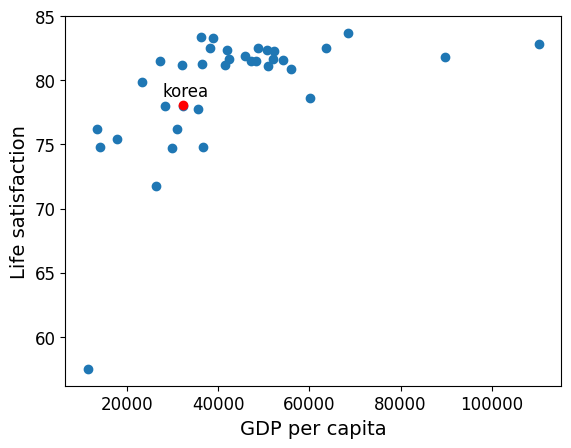

In [ ]:
# 시각화
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.scatter(korea, y_pred, c='r')
plt.text(korea-4500, y_pred+0.7, 'korea')
plt.show()